## Community Detection 
using modularity maximization algorithms 
- Clauset-Newman-Moore (CNM)
- Louvain
- Leiden


generate synthetic network using `Lancichinetti-Fortunato-Radicchi (LFR)` benchmarks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [44]:
from cdlib import algorithms , evaluation
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

In [81]:
from sklearn.metrics import normalized_mutual_info_score


In [42]:
def draw_graph_com(G,coms,colors=None,fig_size=(8,8)):
    
    color_map = {} # map vertex to community to be used as color map
    for i,com in enumerate(coms):
        for v in com:
            color_map[v] = i 
    plt.figure(figsize=fig_size)
    nx.draw(G,cmap=plt.get_cmap('viridis'),node_color=[color_map[v] for v in G.nodes],with_labels=True)
    plt.show()

In [73]:
type(G)

networkx.classes.graph.Graph

In [ ]:
def benchmark(G,algs):
    result = []
    for a in algs:
        result.append()

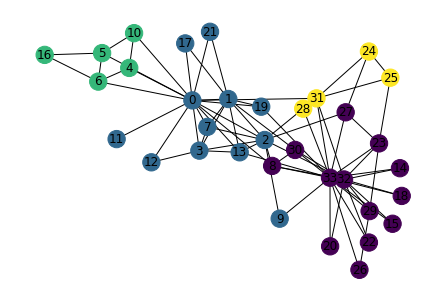

In [7]:
G = nx.karate_club_graph()
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

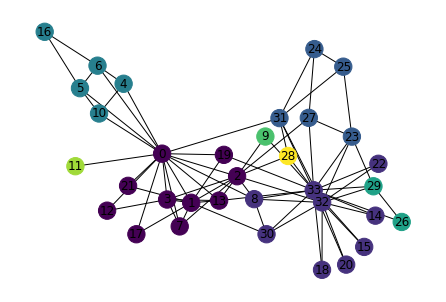

In [9]:
G = nx.karate_club_graph()
coms = algorithms.surprise_communities(G)

draw_graph_com(G,coms.communities)

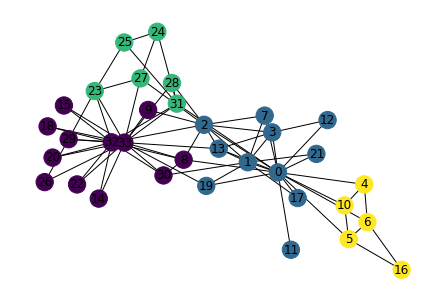

In [10]:
G = nx.karate_club_graph()
coms = algorithms.leiden(G)

draw_graph_com(G,coms.communities)

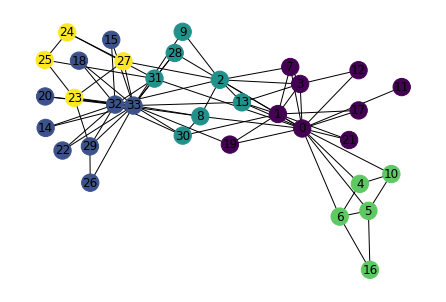

In [11]:
G = nx.karate_club_graph()
coms = algorithms.walktrap(G)

draw_graph_com(G,coms.communities)

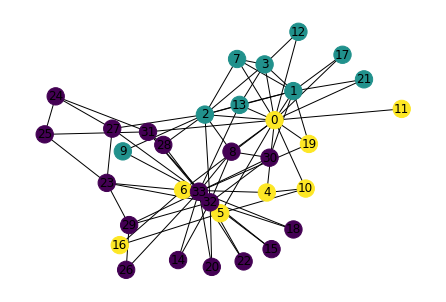

In [12]:
#Clauset-Newman-Moore
G = nx.karate_club_graph()
coms = algorithms.greedy_modularity(G)

draw_graph_com(G,coms.communities)

## LFR benchmark

In [15]:
from networkx.generators.community import LFR_benchmark_graph as lfr

In [90]:
from cdlib.benchmark import LFR
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G, coms = LFR(n, tau1, tau2, mu, average_degree=5, min_community=20)

In [17]:
# parameters
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = lfr(
    n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10
)

In [80]:
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = lfr(
    n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10
)

In [ ]:
draw_graph_com(G,)

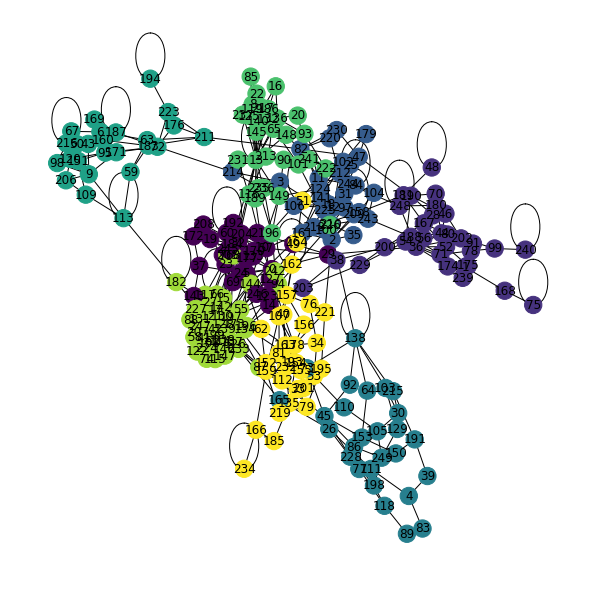

In [91]:
draw_graph_com(G,to_community_list(G))

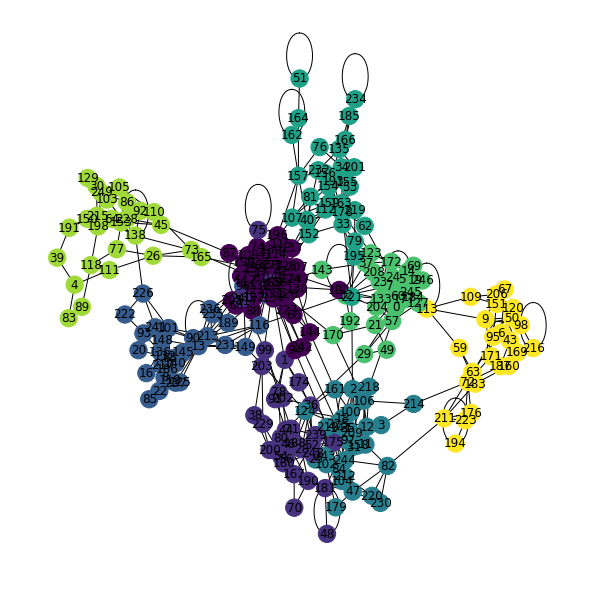

In [92]:
coms = algorithms.leiden(G)

draw_graph_com(G,coms.communities)

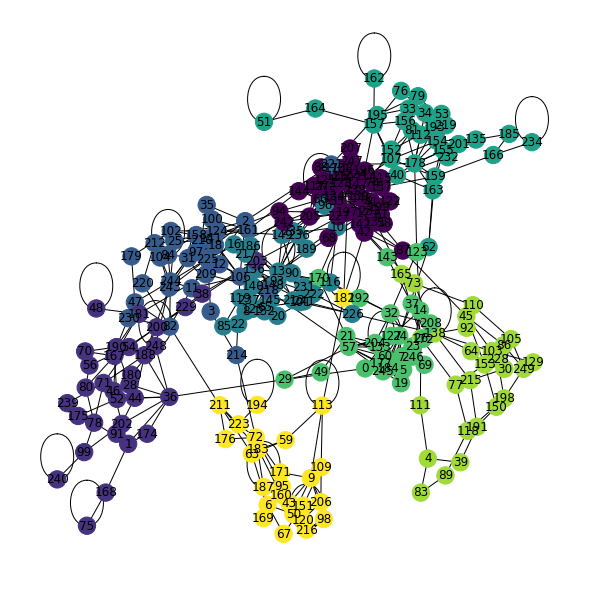

In [93]:
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

[[0,
  1,
  2,
  4,
  5,
  6,
  9,
  10,
  11,
  15,
  17,
  25,
  26,
  30,
  32,
  35,
  41,
  42,
  43,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  56,
  57,
  59,
  60,
  62,
  64,
  66,
  67,
  68,
  71,
  73,
  74,
  77,
  79,
  81,
  84,
  86,
  87,
  88,
  91,
  92,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  103,
  104,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  115,
  116,
  119,
  120,
  123,
  126,
  128,
  130,
  131,
  132,
  135,
  137,
  138,
  139,
  140,
  141,
  143,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  154,
  155,
  156,
  159,
  160,
  161,
  163,
  164,
  165,
  166,
  170,
  171,
  172,
  174,
  176,
  177,
  179,
  181,
  183,
  185,
  186,
  187,
  188,
  189,
  191,
  192,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  204,
  205,
  206,
  207,
  208,
  211,
  212,
  213,
  214,
  215,
  217,
  218,
  220,
  221,
  222,
  223,
  227,
  228,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  238,
  240,
  2

In [36]:
def to_community_list(G):
    #Assumption: communities are disjoint
    l=[]
    visited=set()
    for v in G:
        if v not in visited:
            temp = [node for node in G.nodes[v]["community"]]
            l.append(temp)
            for t in temp:
                visited.add(t)
    return l      

In [67]:
def to_vertex_community(coms):
    return [
        x[1]
        for x in sorted(
            [
                (node, nid)
                for nid, cluster in enumerate(coms)
                for node in cluster
            ],
            key=lambda x: x[0],
        )
    ]

In [45]:
y_true = to_community_list(G)

In [47]:
coms

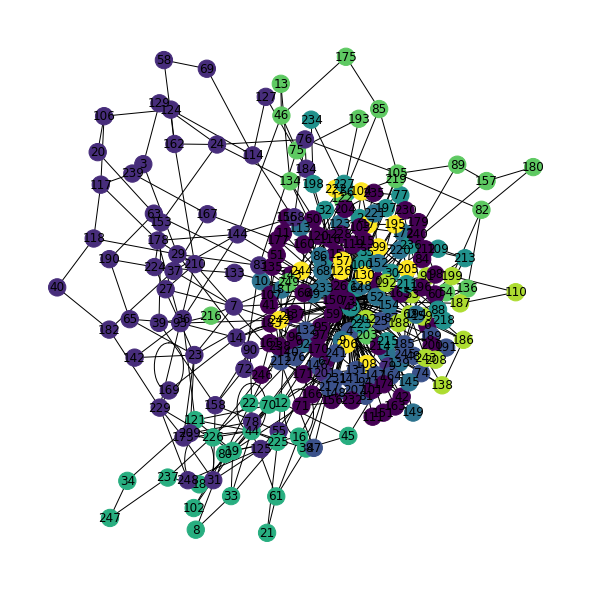

In [48]:
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

In [69]:
evaluation.normalized_mutual_information()


TypeError: 'NodeClustering' object is not iterable

In [52]:
from sklearn.metrics import normalized_mutual_info_score

In [72]:
normalized_mutual_info_score(to_vertex_community(y_true),to_vertex_community(coms.communities))

0.5666286886324403

In [80]:
def normalized_mutual_info_acc(coms_pred, coms_true):
    return normalized_mutual_info_score(
        to_vertex_community(coms_true), to_vertex_community(coms_pred)
    )


In [92]:
# parameters
n = 500
tau1 = 3
tau2 = 1.5
mu = 0.1
G = lfr(
    n, tau1, tau2, mu, average_degree=5, min_community=100, seed=10
)
com_true = to_community_list(G)

coms_louvain = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)
coms_leiden = algorithms.leiden(G)
coms_CNM = algorithms.greedy_modularity(G)
coms_wt = algorithms.walktrap(G)

com_algs = {'louvain':coms_louvain,'leiden':coms_leiden , 'CNM' : coms_CNM,'wt':coms_wt}

for ca in com_algs:
    print(f"{ca} NMI: {normalized_mutual_info_acc(com_algs[ca].communities,com_true)}")

louvain NMI: 0.8723932603410466
leiden NMI: 0.9495666819359518
CNM NMI: 0.966446547705005
wt NMI: 0.9661313185425415


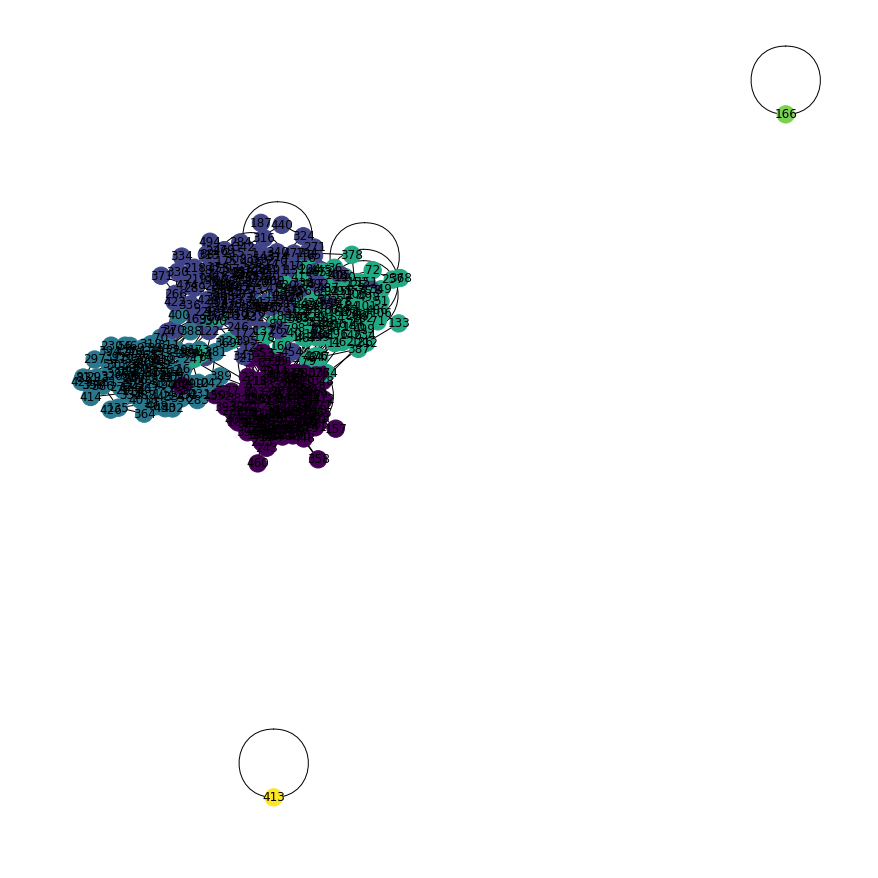

In [93]:
draw_graph_com(G,com_algs['louvain'].communities,fig_size=(12,12))

## Exp1:
    generate LFR using uniform distribution in parameters
    

In [1]:
import numpy as np
from CD_util import *

In [98]:
import time

In [99]:
time.time()

1638869577.7269979

In [97]:
def generate_graph():
    n = np.random.randint(250,20000)
    tau1 = 3
    tau2 = 1.5
    mu = np.random.uniform(0.03,0.75)
    max_degree = int(0.1*n)
    max_community = int(0.1*n)
    average_degree = 20
    G = lfr(
        n, tau1, tau2, mu, average_degree=average_degree, max_community=max_community,max_degree=max_degree, seed=10,
    )
    return G 

In [103]:
# n in [10,200], tau in [2,5], tau2 in [1.1,2], mu in [0.05,0.3]
num_trails = 10
metric = []
params = []
graphs = []

# sizes = [250, 500, 600, 700, 800, 900, 1000, 1200, 2000, 2500, 2800, 3000]
# sizes = [250, 500, 600] 


for i in range(num_trails):
    now=time.time()
    G = genrate_lfr_graph(n)
    graph_gen_time = time.time()-now
    #construct graph

#     params.append((n, tau1, tau2, mu,average_degree,min_community))
    graphs.append(G)
    #experiment
    

    com_true = to_community_list(G)
    
    now=time.time()
    coms_louvain = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)
    coms_louvain_delay = time.time()-now
    
    now=time.time()
    coms_leiden = algorithms.leiden(G)
    coms_leiden_delay = time.time()-now
    
    now=time.time()
    coms_CNM = algorithms.greedy_modularity(G)
    coms_CNM_delay = time.time()-now
    
    now=time.time()
    coms_wt = algorithms.walktrap(G)
    coms_wt_delay=time.time()-now
    
    com_algs = {'louvain':(coms_louvain,coms_louvain_delay),'leiden':(coms_leiden,coms_leiden_delay), 
                'CNM' : (coms_CNM , coms_CNM_delay),'wt':(coms_wt,coms_wt_delay)}
    result = {}
    for ca in com_algs:
        result[ca] = (normalized_mutual_info_acc(com_algs[ca][0].communities,com_true),com_algs[ca][1])
        
    metric.append(result)
    

Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed
Generation Completed


In [74]:
params

[(250, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (500, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (600, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (700, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (800, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (900, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (1000, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (1200, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (2000, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (2500, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (2800, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17),
 (3000, 2.7972317026636606, 1.818699587830174, 0.23823943394136737, 6, 17)]

In [77]:
metric

[{'louvain': 1.0000000000000002,
  'leiden': 1.0000000000000002,
  'CNM': 0.9916470137207929,
  'wt': 1.0000000000000002},
 {'louvain': 1.0, 'leiden': 1.0, 'CNM': 0.9444178432051125, 'wt': 1.0},
 {'louvain': 1.0, 'leiden': 1.0, 'CNM': 0.9130676377695552, 'wt': 1.0},
 {'louvain': 0.9999999999999999,
  'leiden': 0.9999999999999999,
  'CNM': 0.9045454633154215,
  'wt': 0.9999999999999999},
 {'louvain': 1.0, 'leiden': 1.0, 'CNM': 0.8783162022506573, 'wt': 1.0},
 {'louvain': 1.0, 'leiden': 1.0, 'CNM': 0.8970431462149305, 'wt': 1.0},
 {'louvain': 1.0, 'leiden': 1.0, 'CNM': 0.8492713674381345, 'wt': 1.0},
 {'louvain': 0.9942403664171444,
  'leiden': 1.0,
  'CNM': 0.8547805759468186,
  'wt': 1.0},
 {'louvain': 1.0, 'leiden': 1.0, 'CNM': 0.8392626215186966, 'wt': 1.0},
 {'louvain': 0.9955320146394374,
  'leiden': 0.9941712641005828,
  'CNM': 0.8246738898052769,
  'wt': 1.0},
 {'louvain': 0.9961933855716932,
  'leiden': 0.9961933855716932,
  'CNM': 0.8185255409717719,
  'wt': 1.0},
 {'louvain': 

In [76]:
import pickle 
filehandler = open('../data/params.obj', 'wb') 
pickle.dump(params, filehandler)


filehandler = open('../data/metrics.obj', 'wb') 
pickle.dump(metric, filehandler)

filehandler = open('../data/graphs.obj', 'wb') 
pickle.dump(graphs, filehandler)

In [64]:
import pickle 
filehandler = open('../data/graphs.obj', 'rb') 
g = pickle.load(filehandler)

In [66]:
g[0].degree

DegreeView({0: 35, 1: 33, 2: 31, 3: 36, 4: 24, 5: 32, 6: 36, 7: 38, 8: 32, 9: 51, 10: 39, 11: 51, 12: 35, 13: 47, 14: 29, 15: 30, 16: 35, 17: 33, 18: 29, 19: 52, 20: 40, 21: 25, 22: 36, 23: 54, 24: 27, 25: 49, 26: 43, 27: 52, 28: 25, 29: 43, 30: 32, 31: 51, 32: 51, 33: 35, 34: 27, 35: 35, 36: 28, 37: 23, 38: 38, 39: 37, 40: 35, 41: 25, 42: 33, 43: 51, 44: 46, 45: 48, 46: 49, 47: 47, 48: 45, 49: 31, 50: 34, 51: 56, 52: 32, 53: 39, 54: 47, 55: 32, 56: 25, 57: 24, 58: 47, 59: 22, 60: 46, 61: 25, 62: 50, 63: 32, 64: 44, 65: 31, 66: 26, 67: 48, 68: 25, 69: 53, 70: 30, 71: 30, 72: 36, 73: 50, 74: 43, 75: 52, 76: 23, 77: 36, 78: 29, 79: 34, 80: 30, 81: 24, 82: 23, 83: 48, 84: 32, 85: 33, 86: 33, 87: 26, 88: 25, 89: 40, 90: 27, 91: 33, 92: 25, 93: 38, 94: 48, 95: 46, 96: 45, 97: 47, 98: 29, 99: 45, 100: 28, 101: 26, 102: 27, 103: 38, 104: 26, 105: 27, 106: 24, 107: 36, 108: 35, 109: 21, 110: 52, 111: 31, 112: 44, 113: 25, 114: 27, 115: 30, 116: 36, 117: 43, 118: 25, 119: 26, 120: 24, 121: 50, 

In [38]:
from __future__ import print_function
import sys
import threading
from time import sleep
try:
    import thread
except ImportError:
    import _thread as thread

In [43]:
def quit_function(fn_name):
    # print to stderr, unbuffered in Python 2.
    print('{0} took too long'.format(fn_name), file=sys.stderr)
    sys.stderr.flush() # Python 3 stderr is likely buffered.
    thread.interrupt_main() # raises KeyboardInterrupt

In [44]:
def exit_after(s):
    '''
    use as decorator to exit process if 
    function takes longer than s seconds
    '''
    def outer(fn):
        def inner(*args, **kwargs):
            timer = threading.Timer(s, quit_function, args=[fn.__name__])
            timer.start()
            try:
                result = fn(*args, **kwargs)
            finally:
                timer.cancel()
            return result
        return inner
    return outer

In [32]:
@exit_after(6)
def generate_graph(n, tau1, tau2, mu, average_degree, min_community):
    G = lfr(
        n, tau1, tau2, mu, average_degree=average_degree, min_community=min_community,seed=10
    )

In [33]:

def generate_random_lfr(
    n_inter,
    tau1_inter,
    tau2_inter,
    mu_inter,
    average_degree_inter,
    min_community_inter,
    max_iter=10,
):
    generated = False
    count = 1
    G = None
    while not generated and count < max_iter:
        count += 1
        try:
            n = np.random.randint(n_inter[0], n_inter[1])
            tau1 = np.random.uniform(tau1_inter[0], tau1_inter[1])
            tau2 = np.random.uniform(tau2_inter[0], tau2_inter[1])
            mu = np.random.uniform(mu_inter[0], mu_inter[1])
            average_degree = np.random.randint(
                average_degree_inter[0], average_degree_inter[1]
            )
            min_community = np.random.randint(
                min_community_inter[0], min_community_inter[1]
            )
            G = generate_graph(82, 3, 1.3, 0.18, average_degree=5, min_community=50)
            generated = True
        except:
            generated = False
            continue
    if not generated:
        raise Exception("Max iter exceeded")

    return G

In [ ]:
generate_random_lfr

In [34]:

G = generate_random_lfr((250,1000), (2,10), (1.1,5), (0.05,0.8), (1,100), (50,800),max_iter=50)

generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph

Exception: Max iter exceeded

In [ ]:
def genrate_lfr_graph(size=250):
    params = {"n":size, "tau1":2, "tau2":1.1, "mu":0.1, "min_degree":20, "max_degree":50}

    G = lfr(params["n"], params["tau1"], params["tau2"], params["mu"], 
                        min_degree=params["min_degree"],
                        max_degree=params["max_degree"],
                        max_iters=5000, seed = 10,
                        )
    print("Generation Completed")
    return G  


sizes = [250, 500, 600, 700, 800, 900, 1000, 1200, 2000, 2500, 2800, 3000]
for n in sizes:
    G = genrate_lfr_graph(size=n)

In [31]:
params = {"n":250, "tau1":2, "tau2":1.1, "mu":0.1, "min_degree":20, "max_degree":50}

G = lfr(params["n"], params["tau1"], params["tau2"], params["mu"], 
                        min_degree=params["min_degree"],
                        max_degree=params["max_degree"],
                        max_iters=5000,
                        )

KeyboardInterrupt: 

In [28]:
G.degree

DegreeView({0: 35, 1: 33, 2: 31, 3: 36, 4: 24, 5: 32, 6: 36, 7: 38, 8: 32, 9: 51, 10: 39, 11: 51, 12: 35, 13: 47, 14: 29, 15: 30, 16: 35, 17: 33, 18: 29, 19: 52, 20: 40, 21: 25, 22: 36, 23: 54, 24: 27, 25: 49, 26: 43, 27: 52, 28: 25, 29: 43, 30: 32, 31: 51, 32: 51, 33: 35, 34: 27, 35: 35, 36: 28, 37: 23, 38: 38, 39: 37, 40: 35, 41: 25, 42: 33, 43: 51, 44: 46, 45: 48, 46: 49, 47: 47, 48: 45, 49: 31, 50: 34, 51: 56, 52: 32, 53: 39, 54: 47, 55: 32, 56: 25, 57: 24, 58: 47, 59: 22, 60: 46, 61: 25, 62: 50, 63: 32, 64: 44, 65: 31, 66: 26, 67: 48, 68: 25, 69: 53, 70: 30, 71: 30, 72: 36, 73: 50, 74: 43, 75: 52, 76: 23, 77: 36, 78: 29, 79: 34, 80: 30, 81: 24, 82: 23, 83: 48, 84: 32, 85: 33, 86: 33, 87: 26, 88: 25, 89: 40, 90: 27, 91: 33, 92: 25, 93: 38, 94: 48, 95: 46, 96: 45, 97: 47, 98: 29, 99: 45, 100: 28, 101: 26, 102: 27, 103: 38, 104: 26, 105: 27, 106: 24, 107: 36, 108: 35, 109: 21, 110: 52, 111: 31, 112: 44, 113: 25, 114: 27, 115: 30, 116: 36, 117: 43, 118: 25, 119: 26, 120: 24, 121: 50, 

In [30]:
G.degree

DegreeView({0: 35, 1: 33, 2: 31, 3: 36, 4: 24, 5: 32, 6: 36, 7: 38, 8: 32, 9: 51, 10: 39, 11: 51, 12: 35, 13: 47, 14: 29, 15: 30, 16: 35, 17: 33, 18: 29, 19: 52, 20: 40, 21: 25, 22: 36, 23: 54, 24: 27, 25: 49, 26: 43, 27: 52, 28: 25, 29: 43, 30: 32, 31: 51, 32: 51, 33: 35, 34: 27, 35: 35, 36: 28, 37: 23, 38: 38, 39: 37, 40: 35, 41: 25, 42: 33, 43: 51, 44: 46, 45: 48, 46: 49, 47: 47, 48: 45, 49: 31, 50: 34, 51: 56, 52: 32, 53: 39, 54: 47, 55: 32, 56: 25, 57: 24, 58: 47, 59: 22, 60: 46, 61: 25, 62: 50, 63: 32, 64: 44, 65: 31, 66: 26, 67: 48, 68: 25, 69: 53, 70: 30, 71: 30, 72: 36, 73: 50, 74: 43, 75: 52, 76: 23, 77: 36, 78: 29, 79: 34, 80: 30, 81: 24, 82: 23, 83: 48, 84: 32, 85: 33, 86: 33, 87: 26, 88: 25, 89: 40, 90: 27, 91: 33, 92: 25, 93: 38, 94: 48, 95: 46, 96: 45, 97: 47, 98: 29, 99: 45, 100: 28, 101: 26, 102: 27, 103: 38, 104: 26, 105: 27, 106: 24, 107: 36, 108: 35, 109: 21, 110: 52, 111: 31, 112: 44, 113: 25, 114: 27, 115: 30, 116: 36, 117: 43, 118: 25, 119: 26, 120: 24, 121: 50, 